In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from data_preprocessing import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score



In [2]:
X, y = get_X_y()
X.head()
df = pd.DataFrame(X,y)
df.shape
df.head()

,year,length_ft,beam_ft,numEngines,totalHP,created_month,created_year,type_power,type_sail,boatClass_power-aft,...,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV
price,,,,,,,,,,,,,,,,,,,,,
16500.0,0.499841,-0.787496,-0.685431,-0.427059,-0.616465,-0.03449,0.6333,True,False,False,...,False,False,False,True,False,False,False,False,False,False
539000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [4]:
n_comp = 18
print('number of components', n_comp)

number of components 18


In [5]:
cols = ['PC-'+str(i+1) for i in range(n_comp)]
cols


['PC-1',
 'PC-2',
 'PC-3',
 'PC-4',
 'PC-5',
 'PC-6',
 'PC-7',
 'PC-8',
 'PC-9',
 'PC-10',
 'PC-11',
 'PC-12',
 'PC-13',
 'PC-14',
 'PC-15',
 'PC-16',
 'PC-17',
 'PC-18']

PC-1     0.28
PC-2     0.10
PC-3     0.07
PC-4     0.06
PC-5     0.04
PC-6     0.04
PC-7     0.03
PC-8     0.02
PC-9     0.02
PC-10    0.02
PC-11    0.01
PC-12    0.01
PC-13    0.01
PC-14    0.01
PC-15    0.01
PC-16    0.01
PC-17    0.01
PC-18    0.01
dtype: float64


<Axes: title={'center': 'PVE'}>

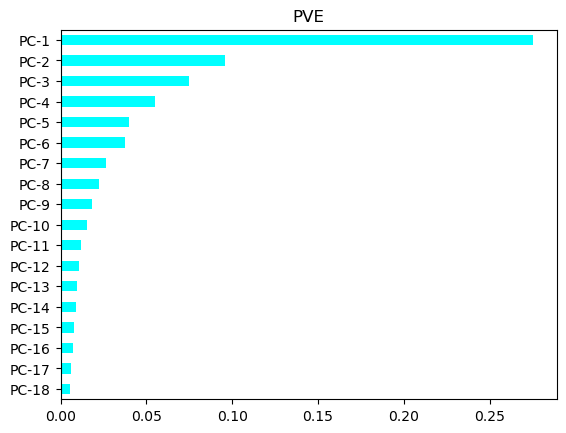

In [6]:
pca = PCA(n_components=n_comp)
pca.fit(X_train)
PVE = pca.explained_variance_ratio_
PVE = pd.Series(PVE,index=cols)
print(PVE.round(2))
PVE.sort_values().plot.barh(color='cyan',title='PVE')

In [7]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Z_train = pd.DataFrame(Z_train, columns=cols)
Z_test = pd.DataFrame(Z_test, columns=cols)
lr = LinearRegression()
lr.fit(Z_train,y_train)
(Z_train.shape)

(5049, 18)

In [8]:
print(lr.score(Z_train, y_train))
print(lr.score(Z_test, y_test))

0.5248997567073647
0.6035507038228585


## Looking at loading scores

## Linear Regressor

In [9]:
def EvaluateR2(model,candidates,Z_train,y_train,R2_test,R2_train):
    features = model.copy()
    n = 0
    nums = [n]
    while n< len(candidates)-1:
        n=n+1
        nums.append(n)
        # fit regressor and evaluate R2
        features.append(candidates[n])
        lr.fit(Z_train[features],y_train)
        print(lr.score(Z_test[features],y_test))
        if lr.score(Z_test[features],y_test) <=R2_test[-1]:
            features.remove(candidates[n])
        else:
            lrBest = LinearRegression()
            lrBest.fit(Z_train[features],y_train)
            R2_train.append(lrBest.score(Z_train[features],y_train))
            R2_test.append(lrBest.score(Z_test[features],y_test))
           
        print(R2_test[-1])
        
    return (lrBest,features, nums,R2_test,R2_train,R2_test[-1],R2_train[-1])

In [10]:
candidates = list(Z_train.columns)
print(candidates)
R2_test=[]
R2_train=[]
model = [candidates[0]]
candidates.remove(candidates[0])
lr = LinearRegression()
lr.fit(Z_train[model],y_train)
R2_train.append(lr.score(Z_train[model],y_train))
R2_test.append(lr.score(Z_test[model],y_test))
(lrBest,featuresBest, nums,R2_test,R2_train,lastTest, lastTrain) = EvaluateR2(model,candidates,Z_train,y_train,R2_test,R2_train)


['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15', 'PC-16', 'PC-17', 'PC-18']
0.4087334253447592
0.4087334253447592
0.4095300376422081
0.4095300376422081
0.40738751068117174
0.4095300376422081
0.4090271442950485
0.4095300376422081
0.5051759552782596
0.5051759552782596
0.5611408034190537
0.5611408034190537
0.5645864028174806
0.5645864028174806
0.5777970842328077
0.5777970842328077
0.5763485151355705
0.5777970842328077
0.5775638358521865
0.5777970842328077
0.5769596817737865
0.5777970842328077
0.5804963539628993
0.5804963539628993
0.5841284690276773
0.5841284690276773
0.5886977161246012
0.5886977161246012
0.590707302532685
0.590707302532685
0.5925475965363045
0.5925475965363045


In [11]:
coeffs = pd.Series(lrBest.coef_,featuresBest)
coeffs.sort_values()

PC-7    -109978.043502
PC-4     -36815.417614
PC-17    -33530.983831
PC-14    -31491.571612
PC-15     34892.679143
PC-9      36558.055285
PC-18     39546.579688
PC-16     46526.135581
PC-1      71208.300933
PC-10     72572.277027
PC-3      86561.442958
PC-8      98641.035417
dtype: float64

## Random Forest


         best B = {'n_estimators': 180}
  validation R2 = 0.69


<Axes: xlabel='trees'>

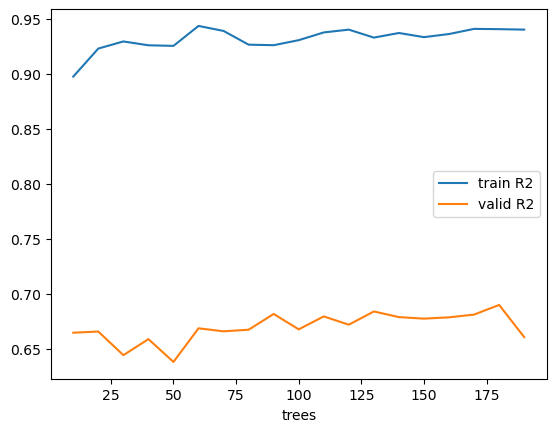

In [12]:
# cross-validate to determine optimal depth
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])

In [13]:
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

test R2 0.675


## Boosting Trees 

In [14]:
#Boosting: Stage 1
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(Z_train,y_train)
yh1 = tree1.predict(Z_train)
yhTree= tree1.predict(Z_test)
R2 = r2_score(y_train,yh1)
R2_test = r2_score(y_test,yhTree)
print('Stage 1')
print('    Train R2',R2)
print('    Test R2',R2_test)

Stage 1
    Train R2 0.7290430883249684
    Test R2 0.35365076531075157


In [15]:
#Boosting Stage 2
dy1 = y_train - yh1
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(Z_train,dy1)
dy1h = tree2.predict(Z_train)
yh2 = yh1 + dy1h
## test
dy1hTest = tree2.predict(Z_test)
yh2Test = yhTree + dy1hTest
## scores
R2 = r2_score(y_train,yh2)
print('Stage 2')
print('    Train R2',R2)
R2_test = r2_score(y_test,yh2Test)
print('    Test R2',R2_test)

Stage 2
    Train R2 0.8146691976576372
    Test R2 0.5076142672716109


In [16]:
#Boosting Stage 3
dy2 = y_train - yh2
tree3 = DecisionTreeRegressor(max_depth=2)
tree3.fit(Z_train,dy2)
dy2h = tree3.predict(Z_train)
yh3 = yh2 + dy2h
# Test
dy2hTest = tree3.predict(Z_test)
yh3Test = yh2Test +dy2hTest


R2 = r2_score(y_train,yh3)
print('Stage 3')
print('    Train R2',R2)
R2_test = r2_score(y_test,yh3Test)
print('    Test R2',R2_test)

Stage 3
    Train R2 0.8585866787767074
    Test R2 0.5272795859146215


In [17]:
#Boosting Stage 4
dy3 = y_train - yh3
tree4 = DecisionTreeRegressor(max_depth=2)
tree4.fit(Z_train,dy3)
dy3h = tree4.predict(Z_train)
yh4 = yh3 + dy3h
# Test 
dy3hTest = tree4.predict(Z_test)
yh4Test = yh3Test +dy3hTest

R2 = r2_score(y_train,yh4)
print('Stage 4')
print('    Train R2',R2)
R2_test = r2_score(y_test,yh4Test)
print('    Test R2',R2_test)

Stage 4
    Train R2 0.8810889119290322
    Test R2 0.5087224776691249


In [18]:
#Boosting Stage 5
dy4 = y_train - yh4
tree5 = DecisionTreeRegressor(max_depth=2)
tree5.fit(Z_train,dy4)
dy4h = tree5.predict(Z_train)
yh5 = yh4 + dy4h
# Test 
dy4hTest = tree5.predict(Z_test)
yh5Test = yh4Test +dy4hTest

R2 = r2_score(y_train,yh5)
print('Stage 5')
print('    Train R2',R2)
R2_test = r2_score(y_test,yh5Test)
print('    Test R2',R2_test)

Stage 5
    Train R2 0.8925536243722741
    Test R2 0.5063969030579858


[Text(0.5, 0.8333333333333334, 'PC-7 <= -0.683\nsquared_error = 8972519277.588\nsamples = 5049\nvalue = 0.0'),
 Text(0.25, 0.5, 'PC-10 <= 0.386\nsquared_error = 92394281793.23\nsamples = 206\nvalue = 88723.135'),
 Text(0.125, 0.16666666666666666, 'squared_error = 57259229079.883\nsamples = 148\nvalue = 142180.574'),
 Text(0.375, 0.16666666666666666, 'squared_error = 156149871925.396\nsamples = 58\nvalue = -47685.5'),
 Text(0.75, 0.5, 'PC-3 <= -0.672\nsquared_error = 5075049090.143\nsamples = 4843\nvalue = -3773.893'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3531823088.869\nsamples = 1140\nvalue = -31847.312'),
 Text(0.875, 0.16666666666666666, 'squared_error = 5232820620.797\nsamples = 3703\nvalue = 4868.747')]

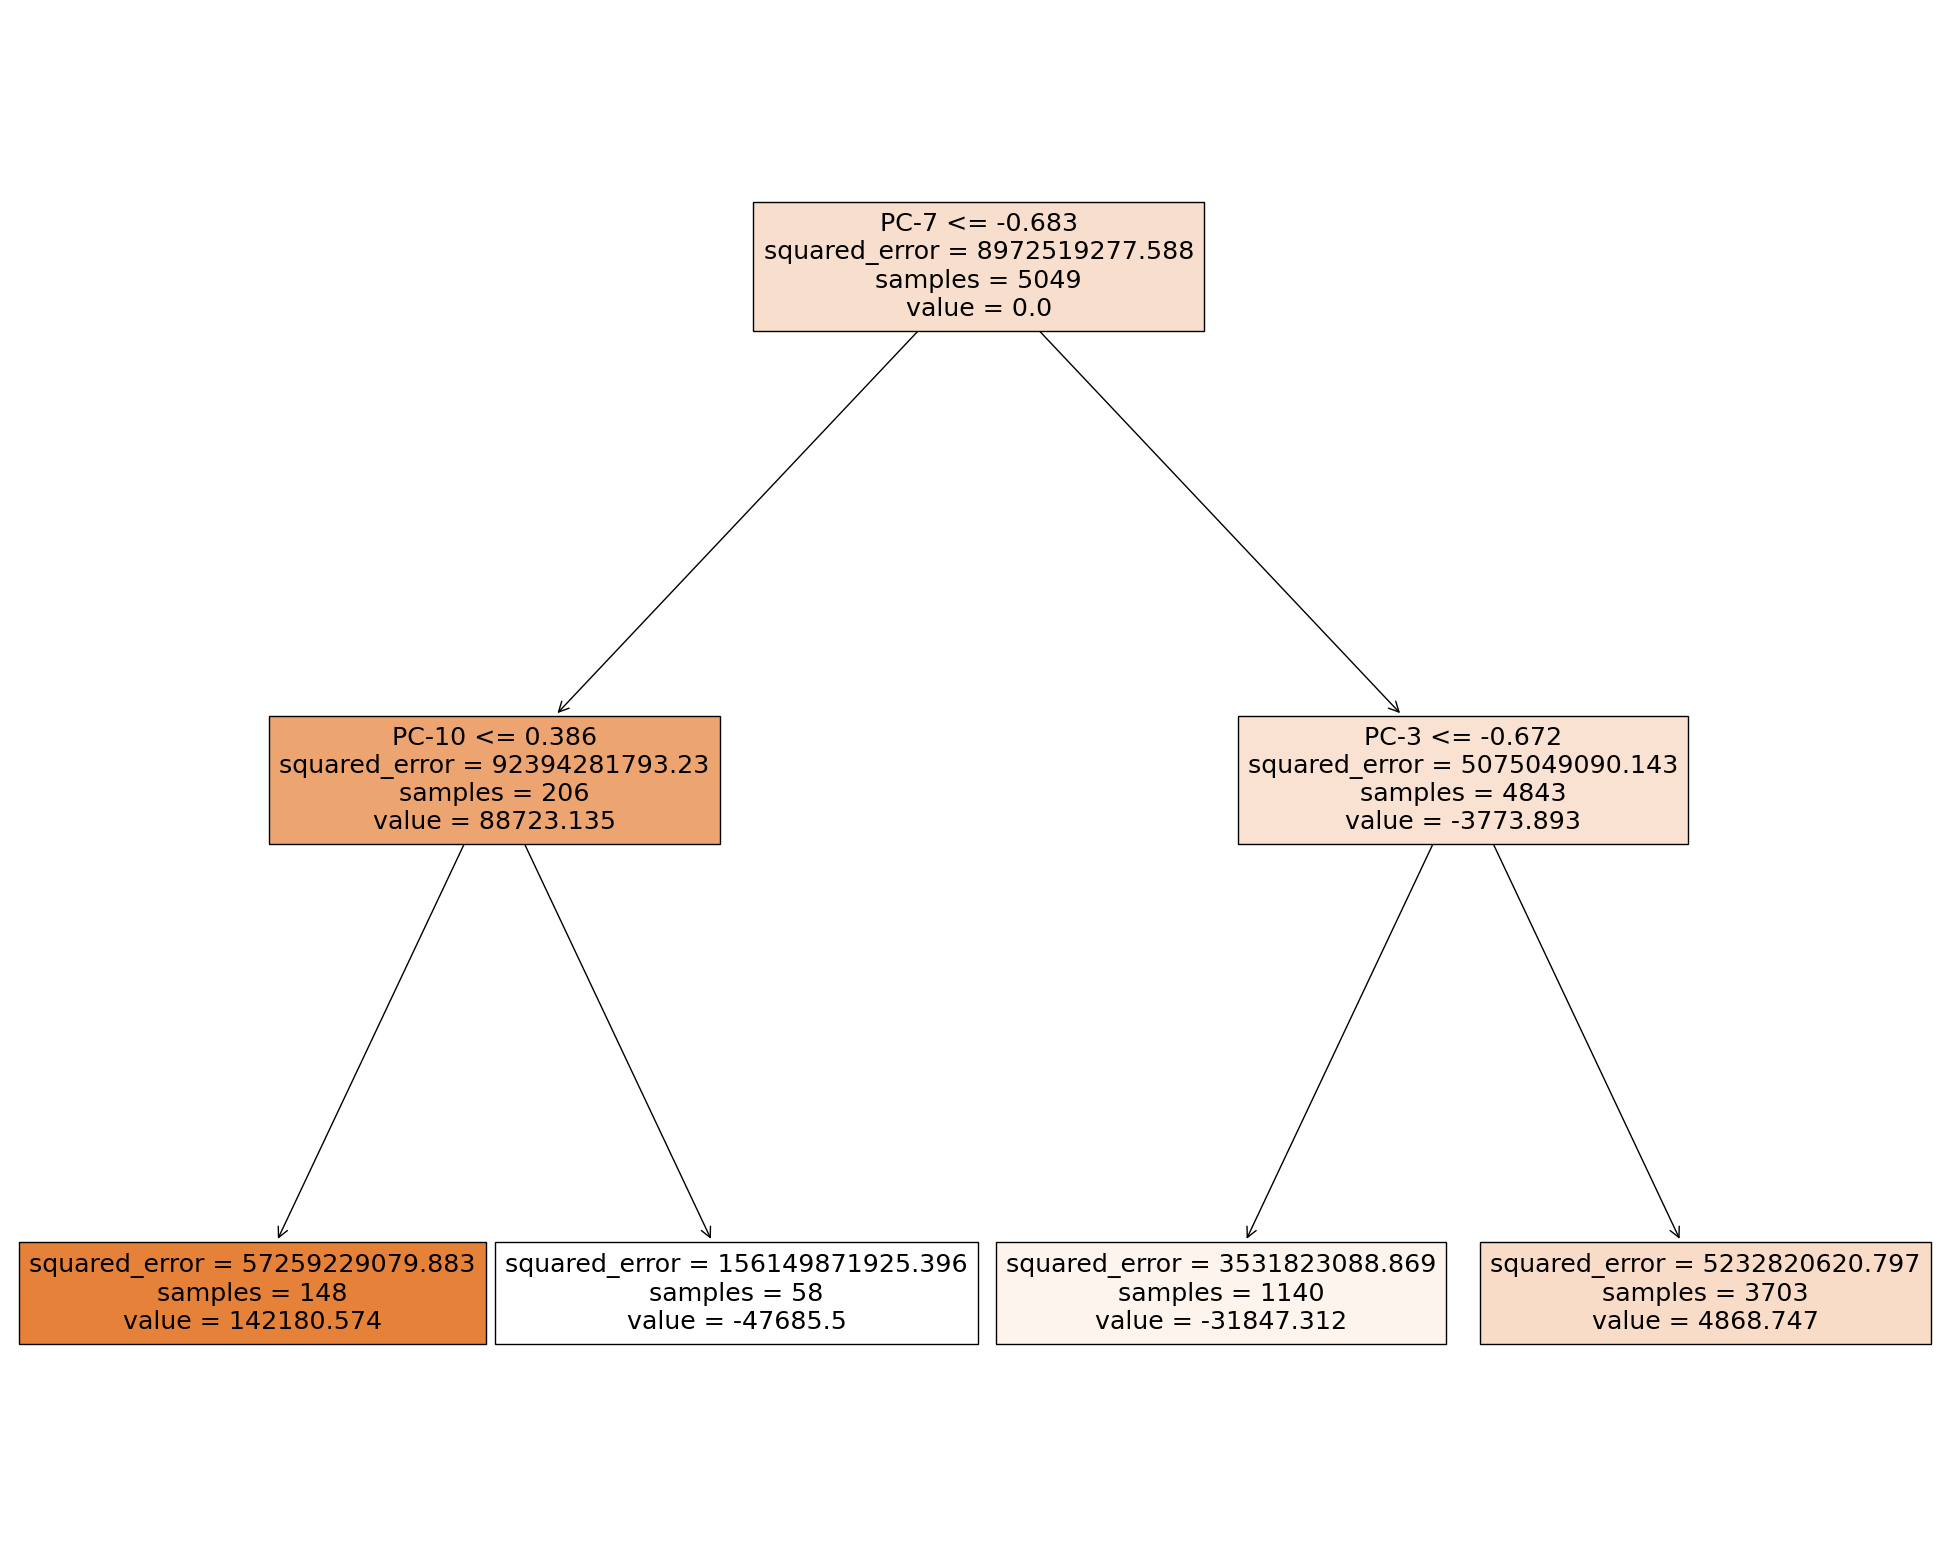

In [19]:
## Visualize Tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree5, feature_names = Z_train.columns, class_names = y_train, filled=True)

## Optimized Random Forest


         best B = {'n_estimators': 70}
  validation R2 = 0.694


<Axes: xlabel='trees'>

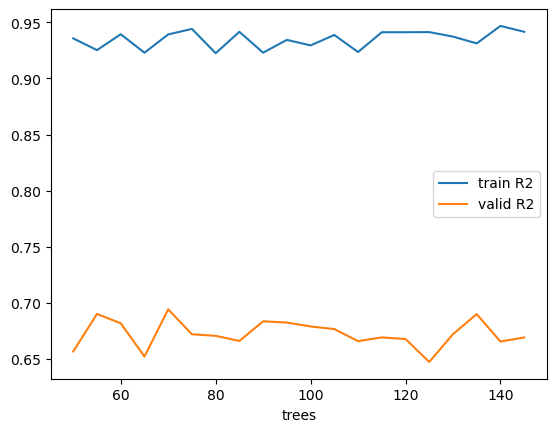

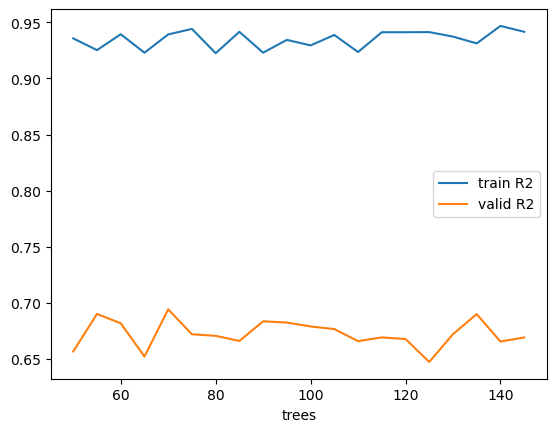

In [20]:
# cross-validate to determine optimal depth
B = np.arange(50,150,5)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
results.plot.line(x='trees',y=['train R2','valid R2'])


In [21]:
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

test R2 0.674



         best B = {'n_estimators': 114}
  validation R2 = 0.691
test R2 0.682


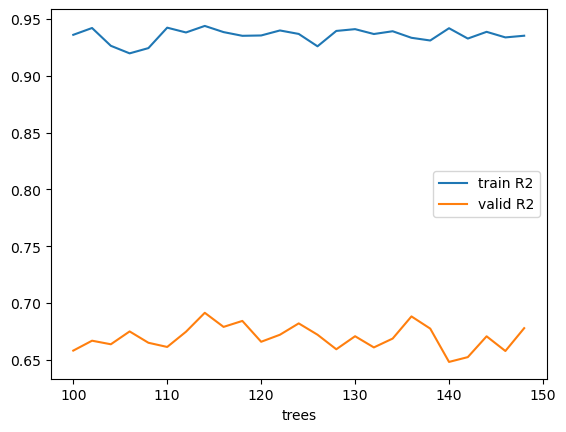

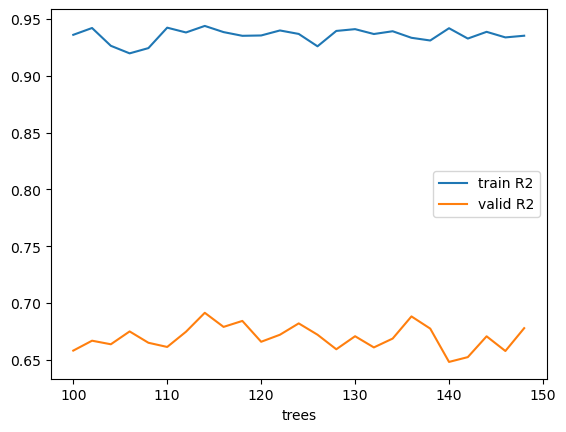

In [22]:
# Third cross-validate to determine optimal depth
B = np.arange(100,150,2)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [23]:
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

test R2 0.682



         best B = {'n_estimators': 141}
  validation R2 = 0.682
test R2 0.677


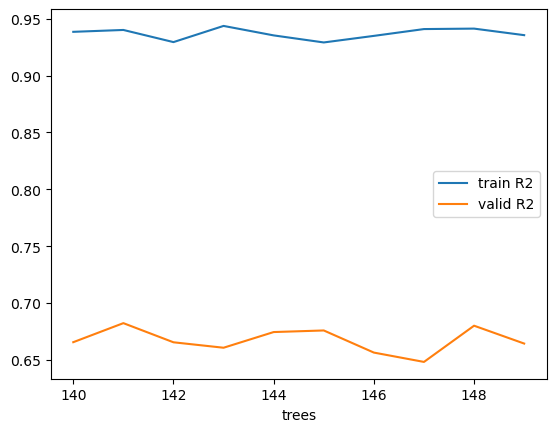

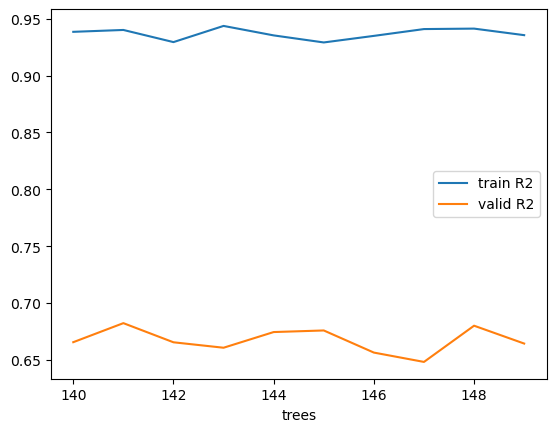

In [24]:
# Fourth cross-validate to determine optimal depth
B = np.arange(140,150,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


         best B = {'n_estimators': 143}
  validation R2 = 0.677
test R2 0.681


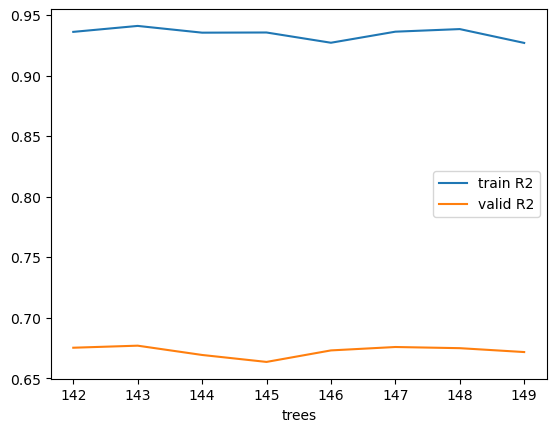

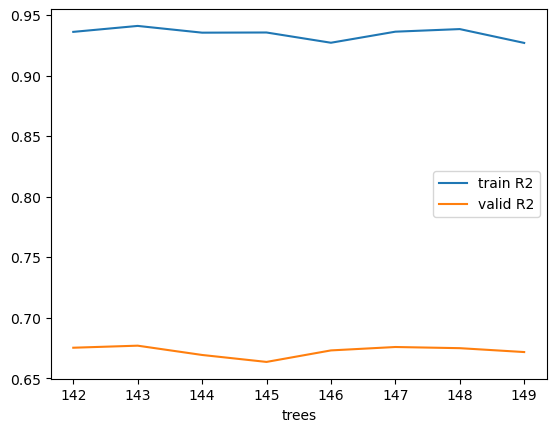

In [25]:
# Fourth cross-validate to determine optimal depth
B = np.arange(142,150,1)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))

In [26]:
# Fourth cross-validate to determine optimal depth
B = np.arange(1,500,20)
grid = {'n_estimators':B}

rf = RandomForestRegressor(max_features = 1/3)    # 1/3 for regressor
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(Z_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])
results.plot.line(x='trees',y=['train R2','valid R2'])
# test R2
print('test R2',rfCV.score(Z_test,y_test).round(3))


KeyboardInterrupt

